In [2]:
!nvidia-smi

Sun Mar 19 06:50:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
HOME = os.getcwd()
print(HOME)
     

/content


In [4]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ROOT_PATH = "/content/drive/MyDrive/yolov8-segmentation"

In [8]:
!pwd

/content


In [9]:
%cd "/content/drive/MyDrive/yolov8-segmentation"

/content/drive/MyDrive/yolov8-segmentation


In [10]:
!ls

dataset  data.yaml  runs  yolo8-segmentation.ipynb  yolov8s-seg.pt


In [11]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=50 imgsz=640 save=true

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, ops

In [14]:
!ls runs/segment/train3/

args.yaml					   results.csv
BoxF1_curve.png					   results.png
BoxP_curve.png					   train_batch0.jpg
BoxPR_curve.png					   train_batch1.jpg
BoxR_curve.png					   train_batch2.jpg
confusion_matrix.png				   train_batch520.jpg
events.out.tfevents.1679208690.95161dfc37b8.939.0  train_batch521.jpg
labels_correlogram.jpg				   train_batch522.jpg
labels.jpg					   val_batch0_labels.jpg
MaskF1_curve.png				   val_batch0_pred.jpg
MaskP_curve.png					   val_batch1_labels.jpg
MaskPR_curve.png				   val_batch1_pred.jpg
MaskR_curve.png					   weights


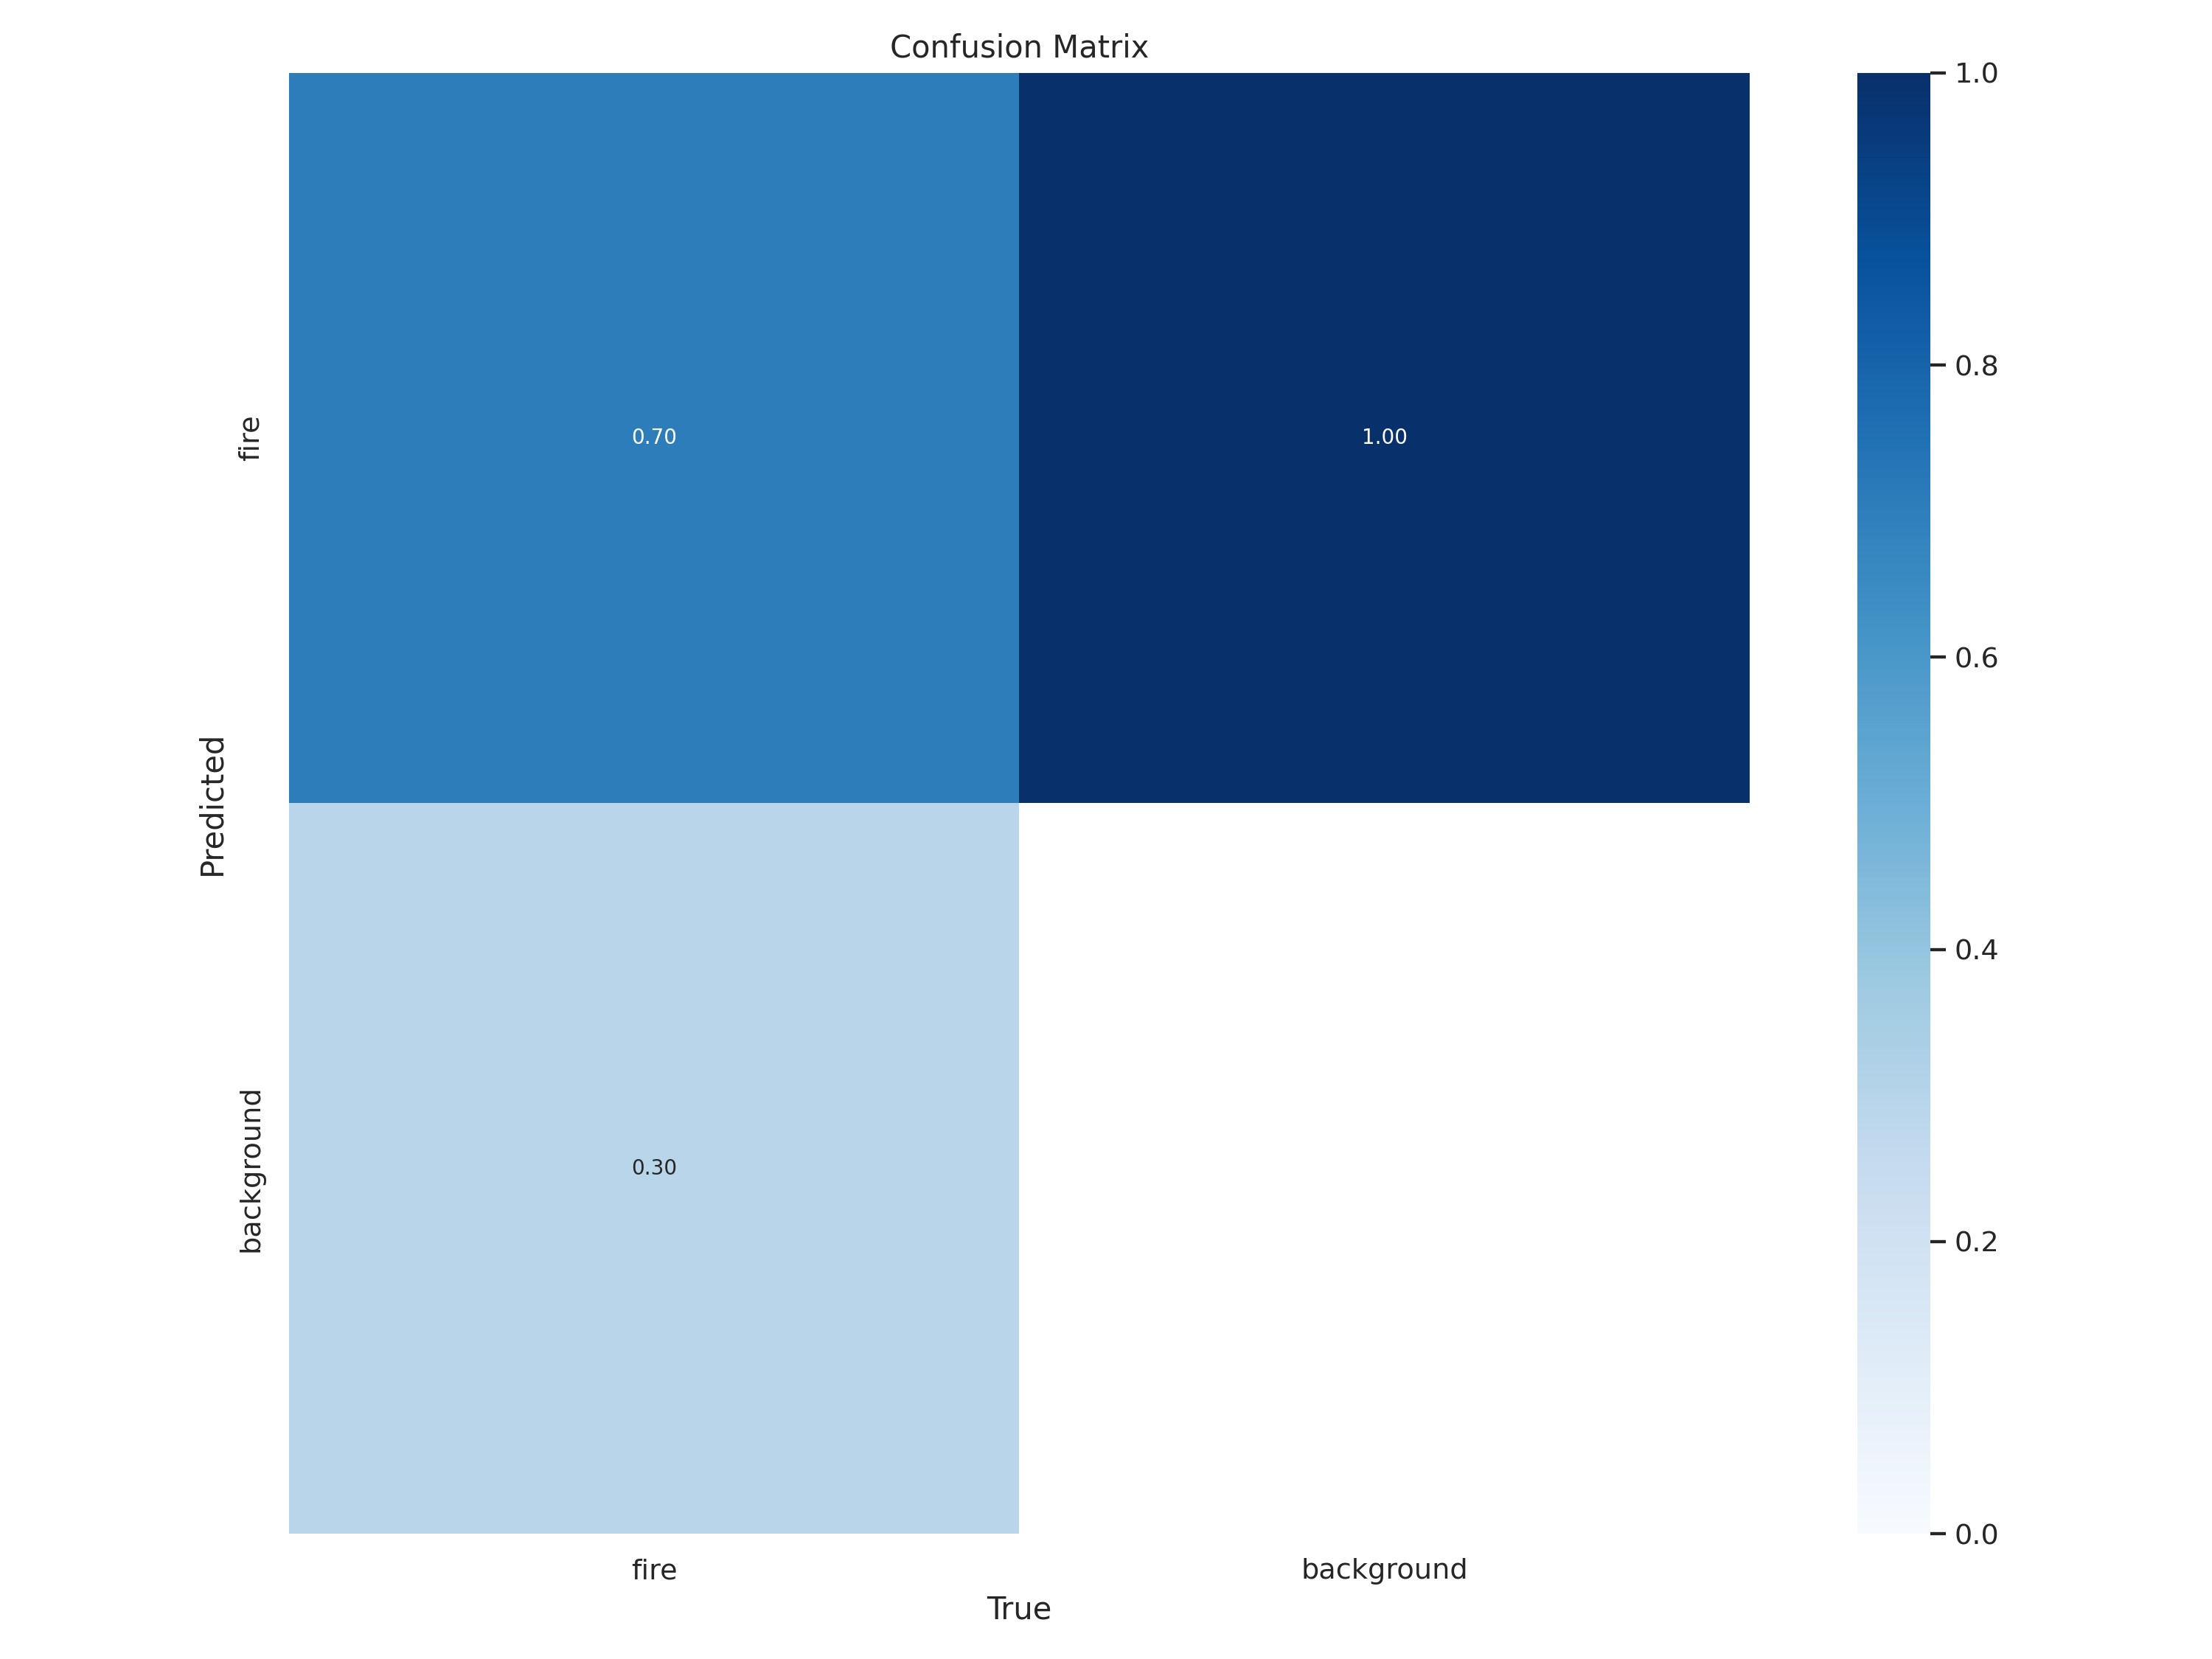

In [15]:
Image(filename=f'runs/segment/train3/confusion_matrix.png', width=600)

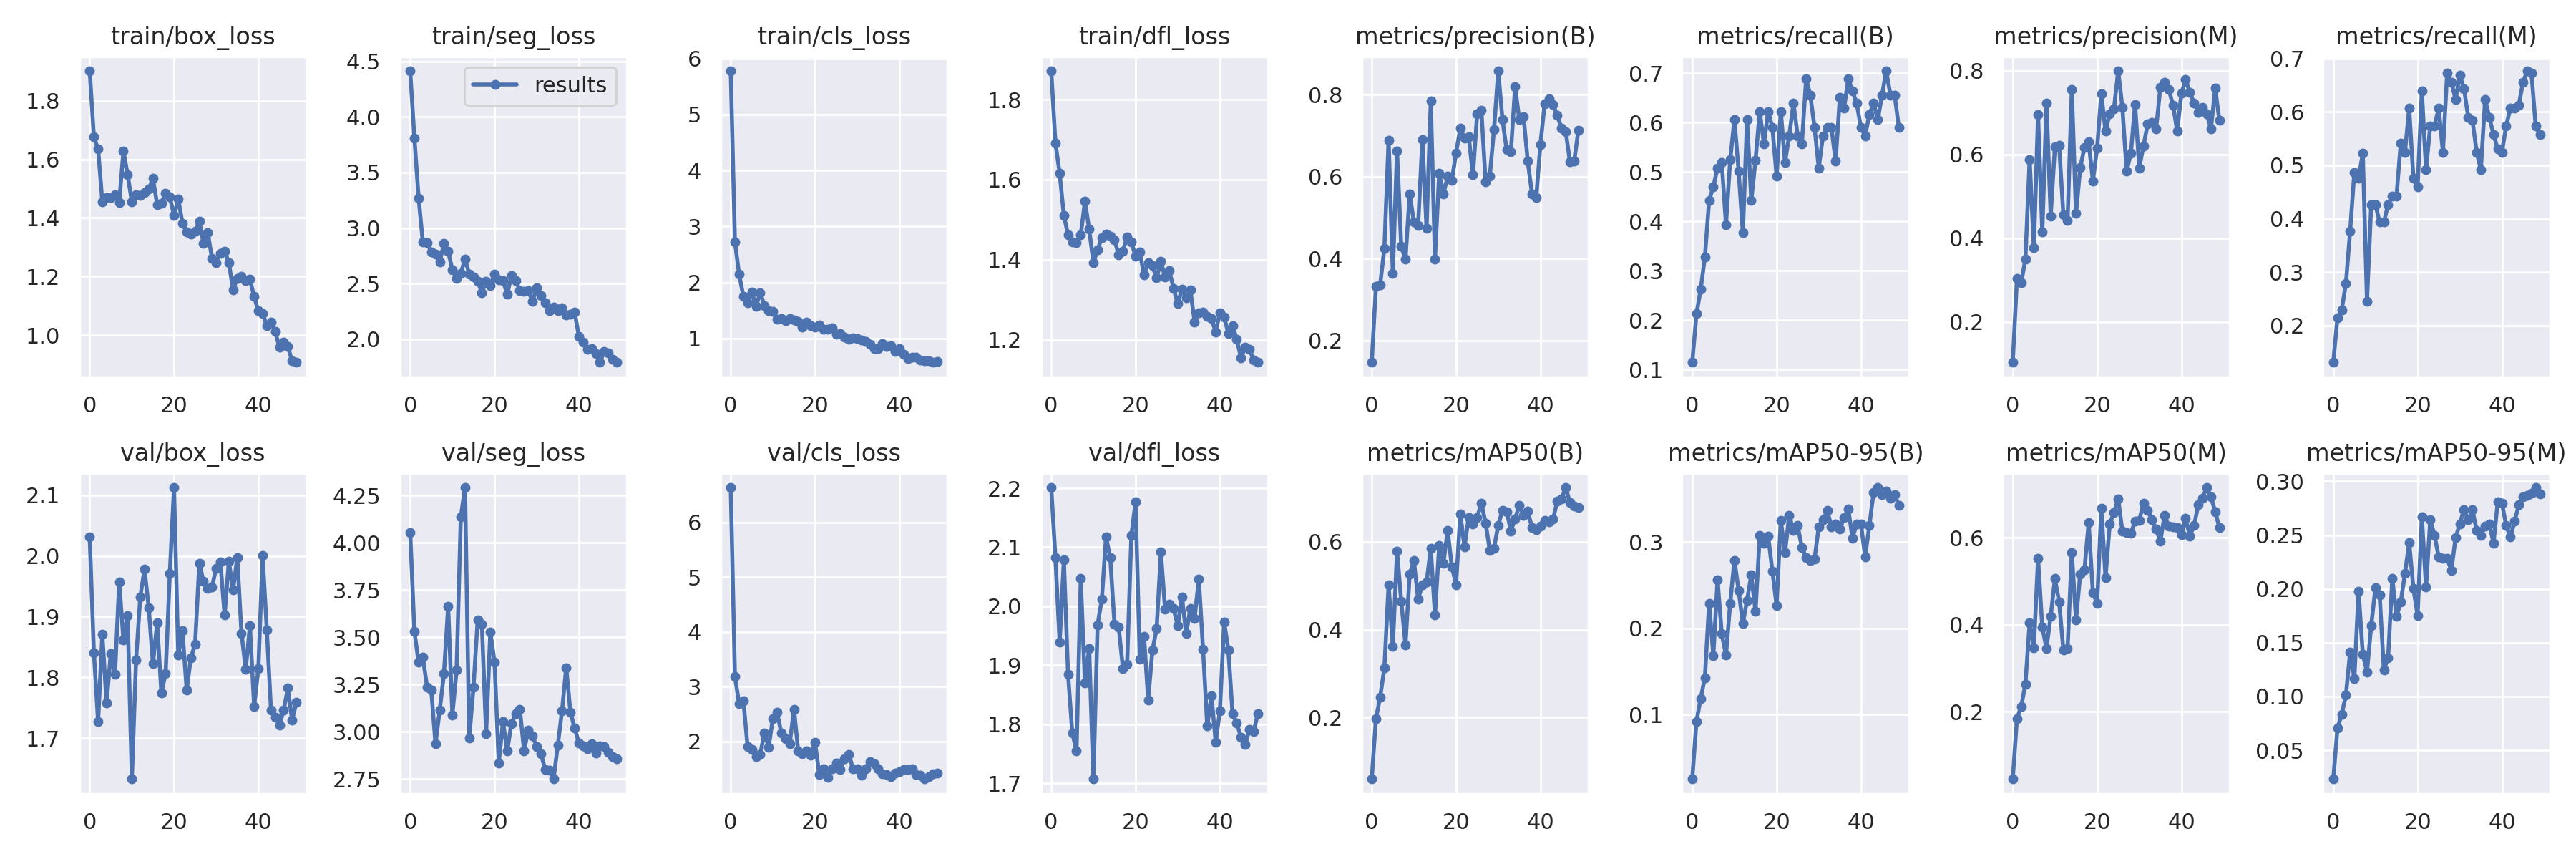

In [16]:
Image(filename=f'runs/segment/train3/results.png', width=600)

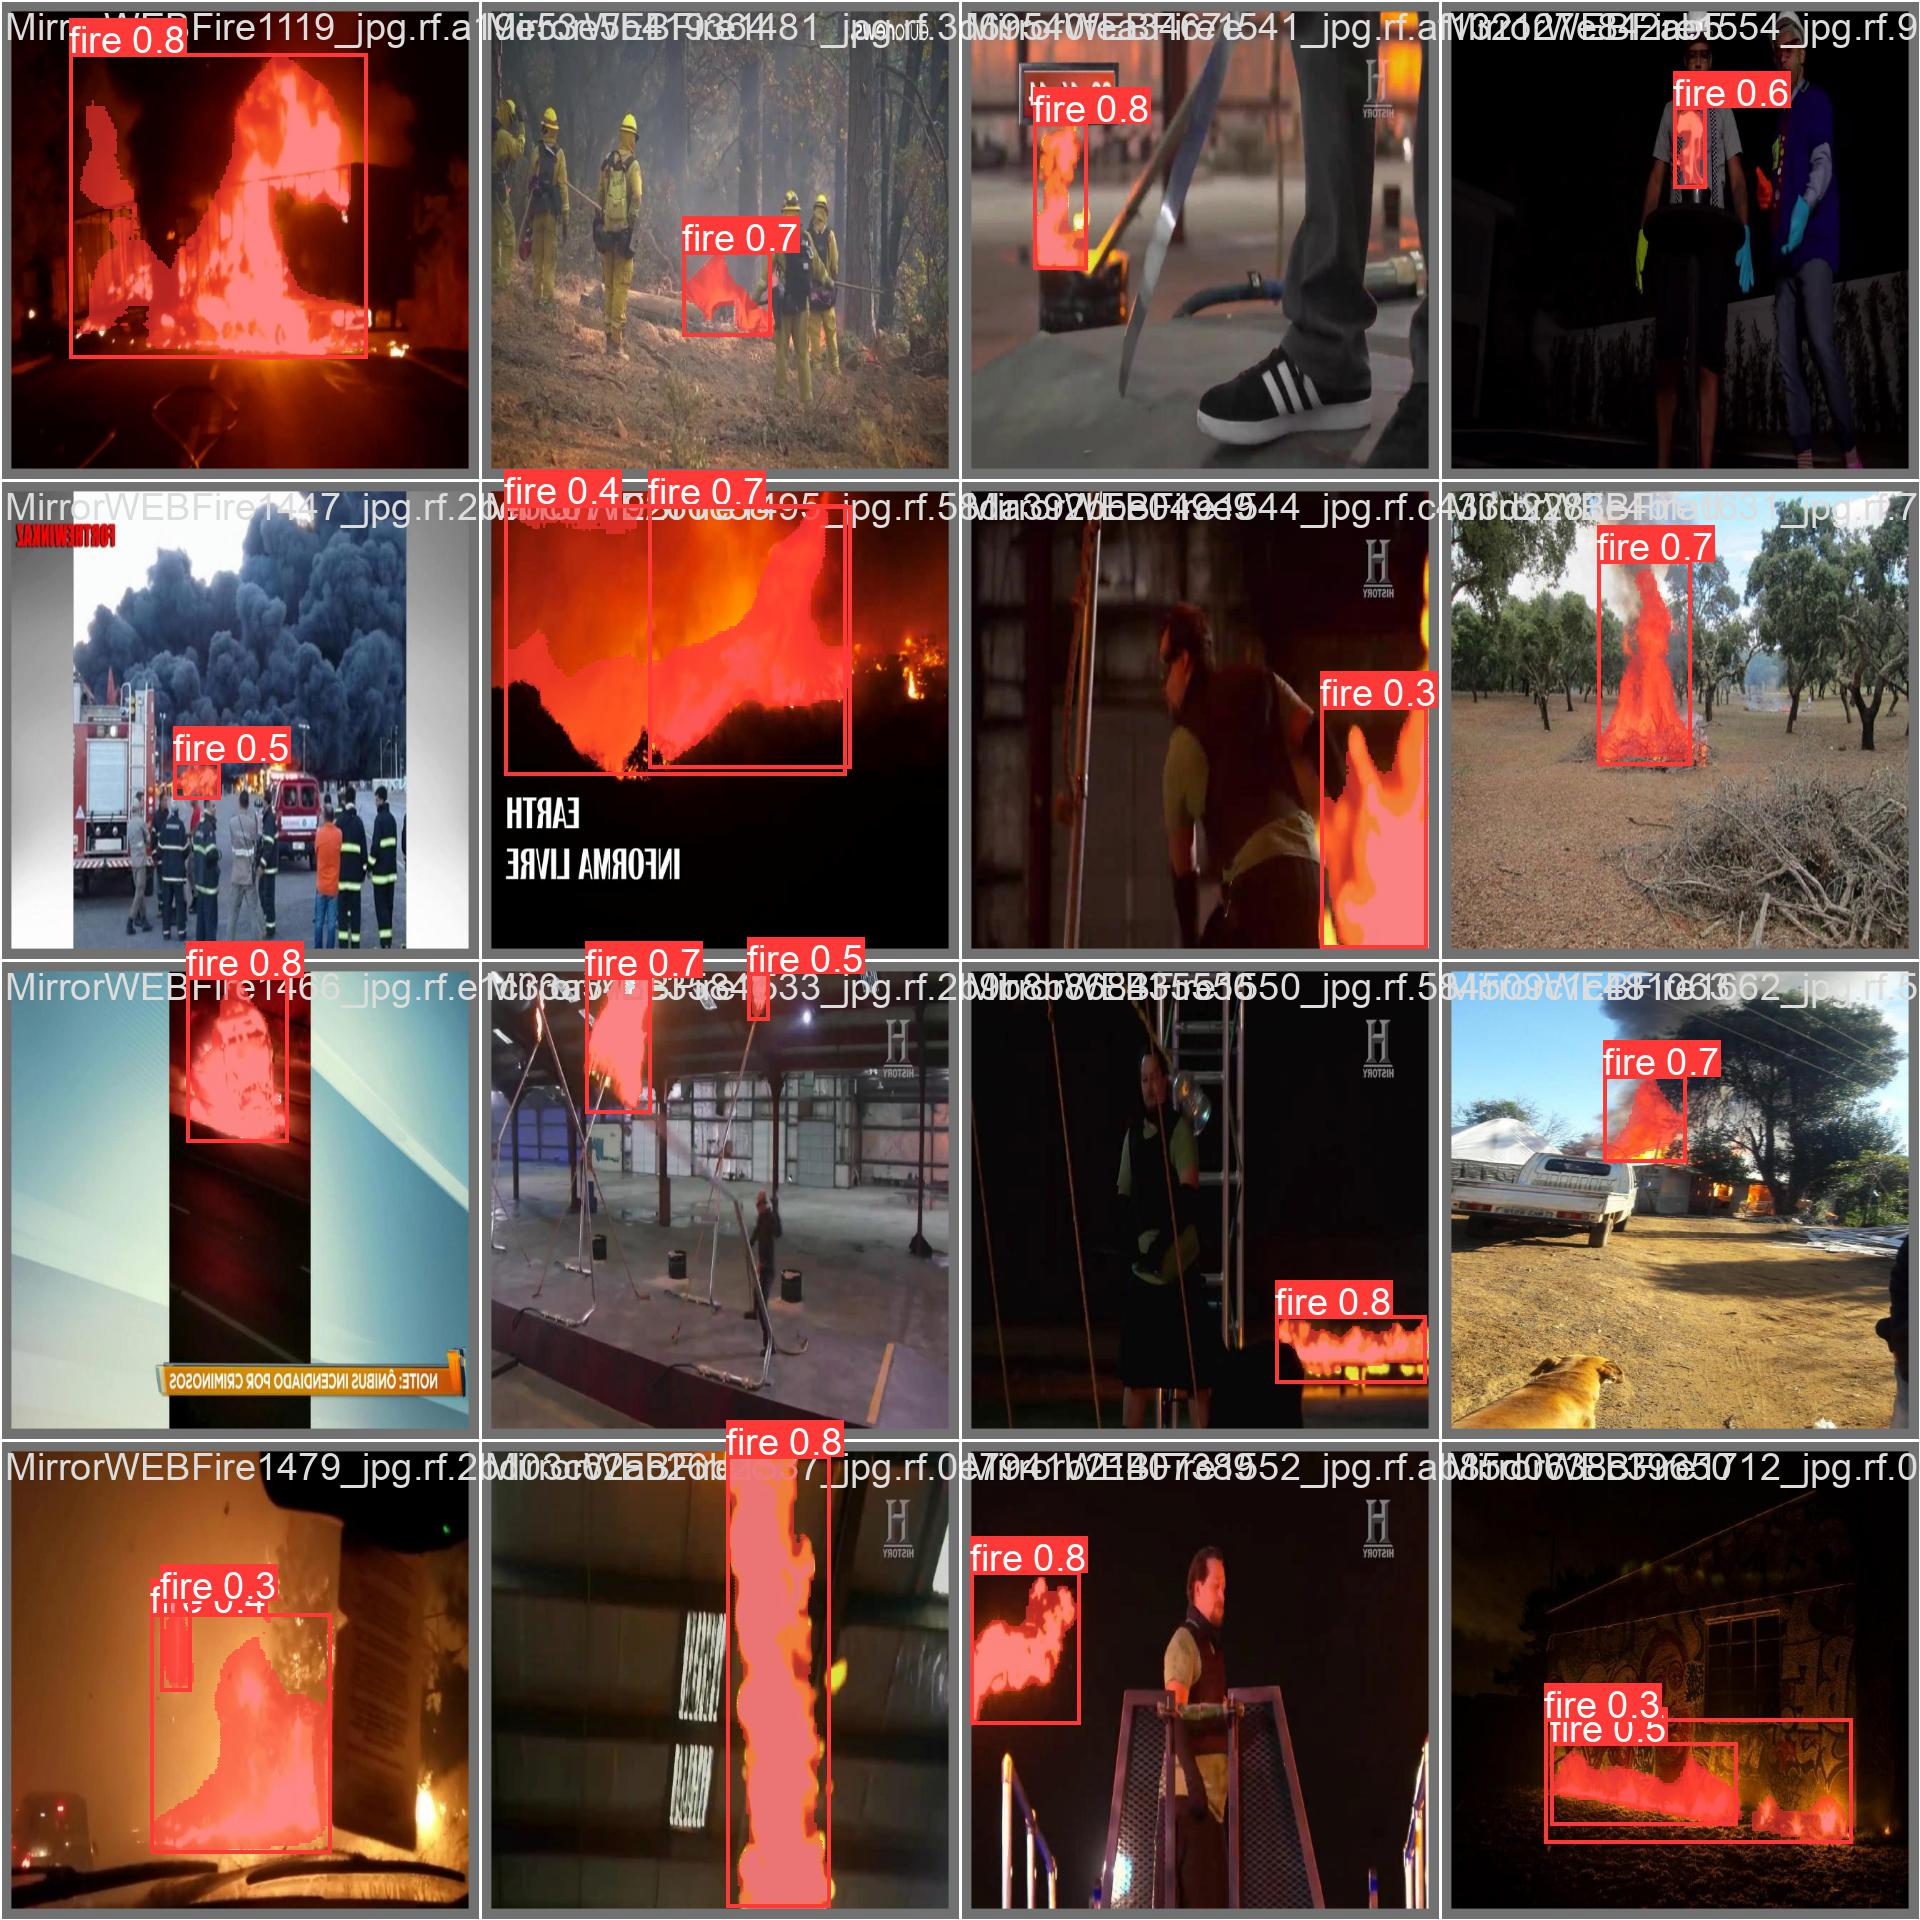

In [17]:
Image(filename=f'runs/segment/train3/val_batch0_pred.jpg', width=600)

In [18]:
!yolo task=segment mode=val model=runs/segment/train3/weights/best.pt data=data.yaml
     

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8-segmentation/dataset/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.24it/s]
                   all         50         61      0.709      0.705      0.724       0.36      0.727      0.655      0.716      0.285
Speed: 3.2ms preprocess, 19.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/segment/val


In [23]:
!yolo task=segment mode=predict model=runs/segment/train3/weights/best.pt conf=0.25 source=dataset/test/images save=true

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/4 /content/drive/MyDrive/yolov8-segmentation/dataset/test/images/3.jpg: 288x640 1 fire, 19.5ms
image 2/4 /content/drive/MyDrive/yolov8-segmentation/dataset/test/images/4.png: 352x640 4 fires, 18.1ms
image 3/4 /content/drive/MyDrive/yolov8-segmentation/dataset/test/images/5.jpg: 384x640 1 fire, 17.8ms
image 4/4 /content/drive/MyDrive/yolov8-segmentation/dataset/test/images/6.jpeg: 384x640 1 fire, 14.7ms
Speed: 0.4ms preprocess, 17.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5


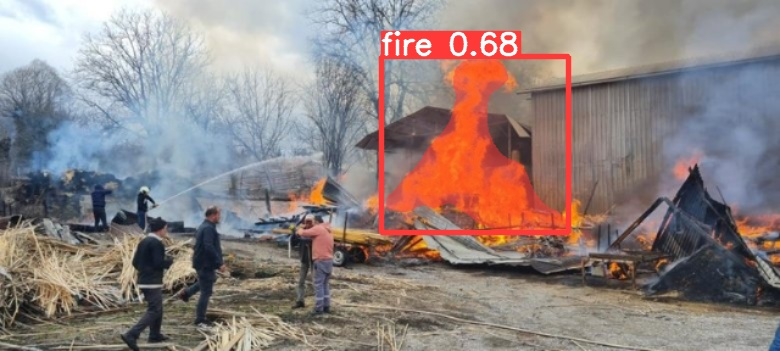

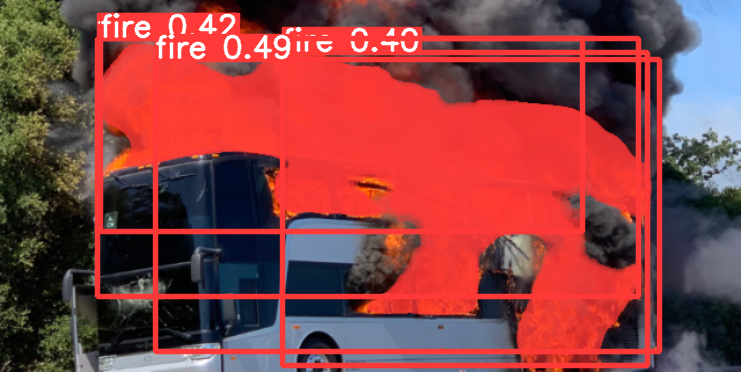

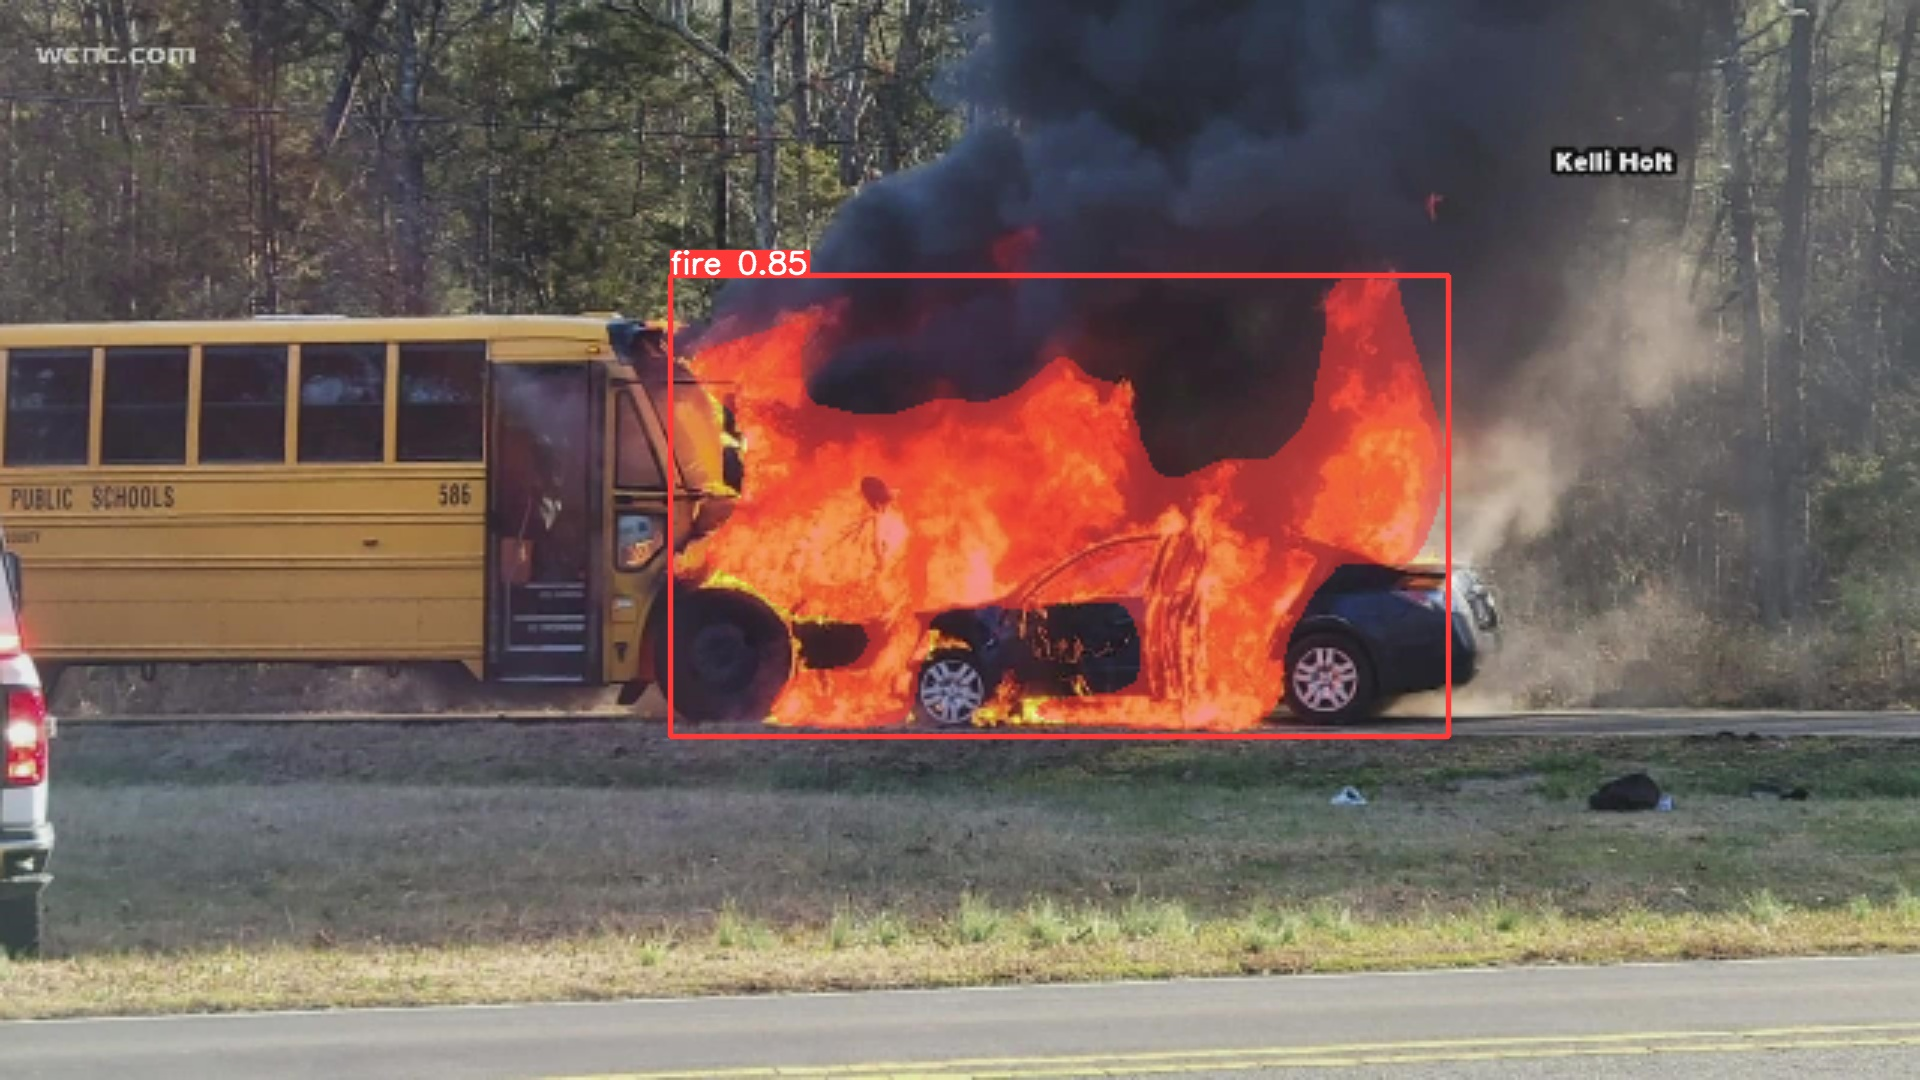

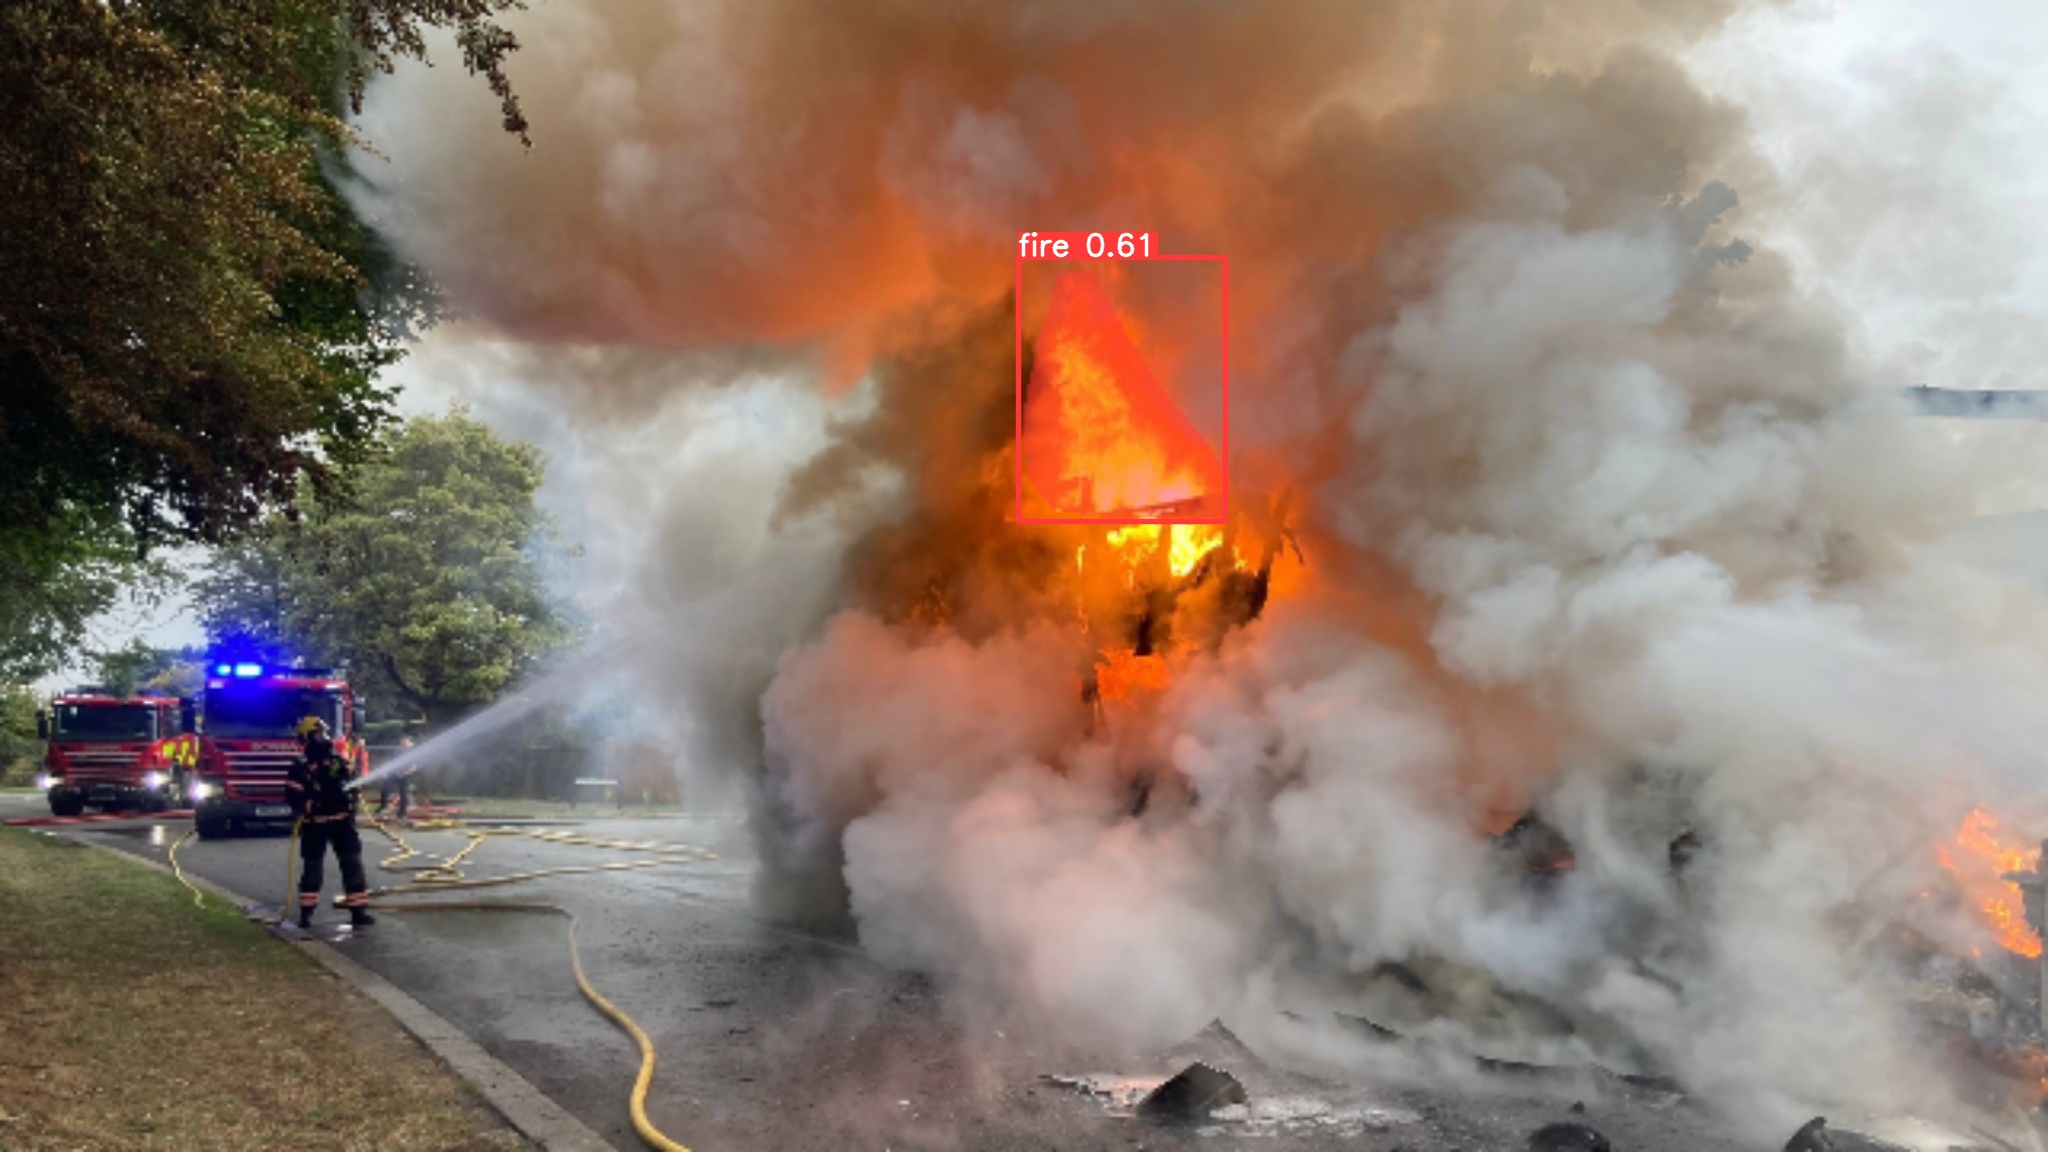

In [30]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict5/*.jpg')[:4]:
      display(Image(filename=image_path, height=200))
      print("\n")

In [33]:
!yolo task=segment mode=predict model=runs/segment/train3/weights/best.pt conf=0.25 source=dataset/test/2.mp4 save=true

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

video 1/1 (1/614) /content/drive/MyDrive/yolov8-segmentation/dataset/test/2.mp4: 384x640 1 fire, 18.4ms
video 1/1 (2/614) /content/drive/MyDrive/yolov8-segmentation/dataset/test/2.mp4: 384x640 1 fire, 15.5ms
video 1/1 (3/614) /content/drive/MyDrive/yolov8-segmentation/dataset/test/2.mp4: 384x640 1 fire, 17.8ms
video 1/1 (4/614) /content/drive/MyDrive/yolov8-segmentation/dataset/test/2.mp4: 384x640 1 fire, 16.0ms
video 1/1 (5/614) /content/drive/MyDrive/yolov8-segmentation/dataset/test/2.mp4: 384x640 1 fire, 26.4ms
video 1/1 (6/614) /content/drive/MyDrive/yolov8-segmentation/dataset/test/2.mp4: 384x640 1 fire, 15.2ms
video 1/1 (7/614) /content/drive/MyDrive/yolov8-segmentation/dataset/test/2.mp4: 384x640 1 fire, 16.4ms
video 1/1 (8/614) /content/drive/MyDrive/yolov8-segmentation/dataset/test/2.mp4: 384x640 1 fire, 